In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image

In [2]:
def convert_format(inp, op, op_format):
                og_image = Image.open(inp)
                og_image.save(op, format=op_format)

In [3]:
convert_format('Image_1.tif','Image.png','PNG')

In [4]:
img = cv2.imread('Image.png')

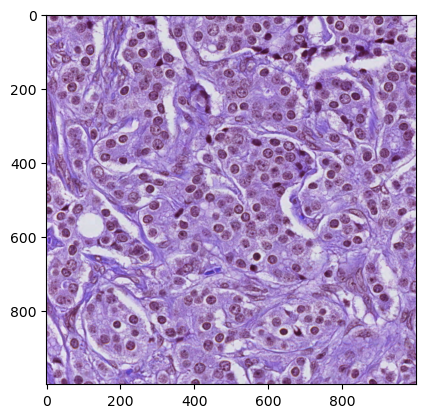

In [5]:
plt.imshow(img)

In [6]:
img_contrast = cv2.detailEnhance(img , 0.01)

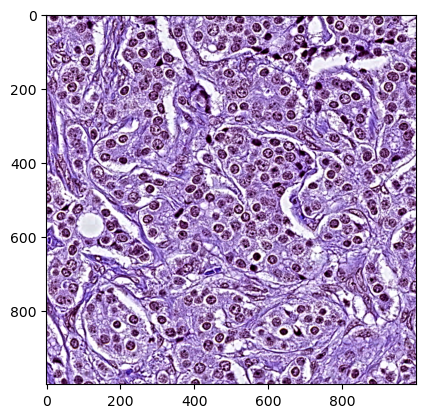

In [7]:
plt.imshow(img_contrast)

In [8]:
enhanced  = cv2.convertScaleAbs(img, alpha=2.5, beta=0)

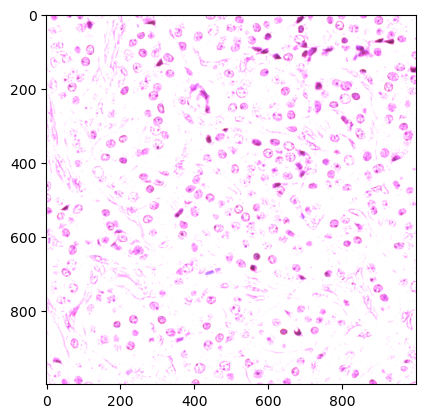

In [9]:
plt.imshow(enhanced)

In [10]:
ret , thr = cv2.threshold(enhanced , 175 , 200 , cv2.THRESH_BINARY)

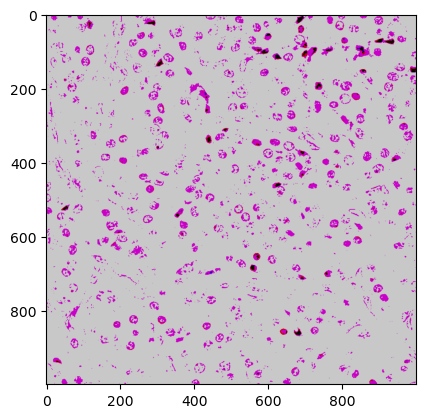

In [11]:
plt.imshow(thr)

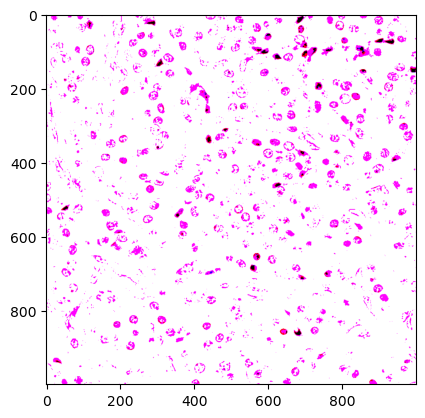

In [12]:
plt.imshow(cv2.convertScaleAbs(thr, alpha=2.5, beta=0))

In [13]:
enh_gr = cv2.cvtColor(cv2.convertScaleAbs(thr, alpha=2.5, beta=0) , cv2.COLOR_RGB2GRAY)
can = cv2.Canny(enh_gr , 100 , 225)

In [14]:
con , hie = cv2.findContours(can , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [15]:
colors = [(255 , 255 , 0) , (255 , 0 , 0) , (0 , 0 , 255) , (0 , 255 , 255) , (255 , 0 , 255)]

In [16]:
c = 0

In [17]:
img2 = img

for cont in con:
    cv2.drawContours(img2 , con  , -1  , [0 , 255 , 0])
    c+=1

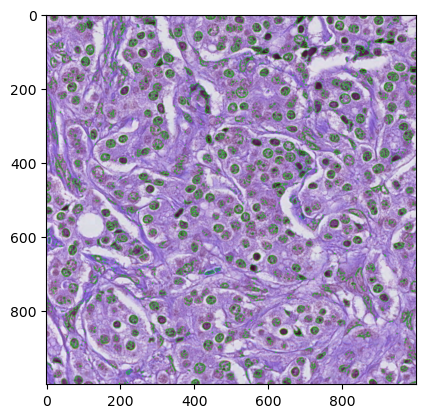

In [18]:
plt.imshow(img2)

In [19]:
for contour in con:
    # Calculate the centroid of the contour
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # Calculate the radius of the circle to cover the contour region
    radius = int(np.sqrt(cv2.contourArea(contour) / np.pi))*2 + 5

    # Draw the circle around the contour
    cv2.circle(img, (cX, cY), radius, colors[c%5], 2)
    c+=1

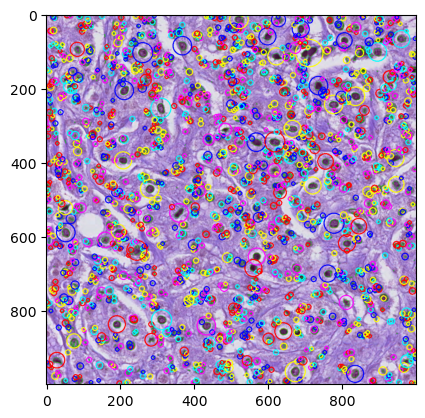

In [20]:
plt.imshow(img)

In [21]:
for contour in con:
    # Calculate the centroid of the contour
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # Calculate the perradius of the circle to cover the contour region
    radius = int(np.sqrt(cv2.contourArea(contour) / np.pi))*2 + 5

    # Draw the circle around the contour if radius is greater than 3
    if radius > 10:
        cv2.circle(img_contrast, (cX, cY), radius, colors[c%5], 2)
    c+=1


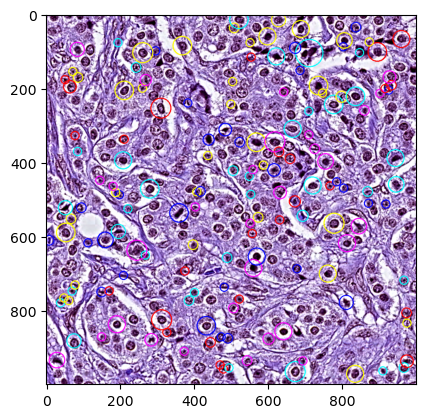

In [22]:
plt.imshow(img_contrast)

In [23]:
import cv2
 
# read the image
image = cv2.imread(r'Image.png')

img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

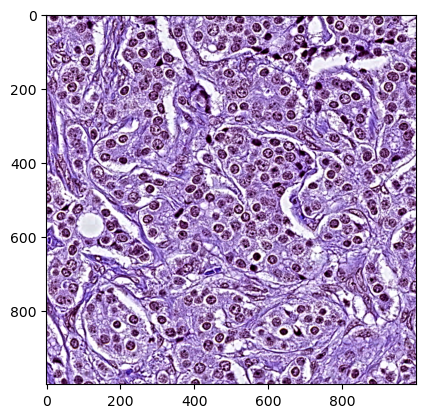

In [24]:
img_contrast = cv2.detailEnhance(image , 0.01)
plt.imshow(img_contrast)

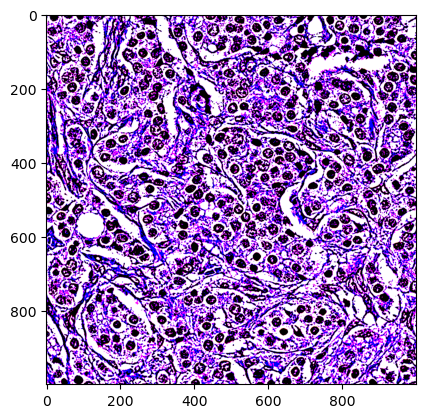

In [25]:
ret, thresh = cv2.threshold(img_contrast, 150, 255, cv2.THRESH_BINARY)
# visualize the binary image
plt.imshow(thresh)

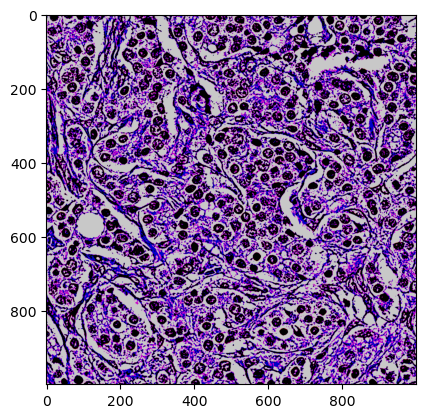

In [26]:
ret , thr = cv2.threshold(thresh , 175 , 200 , cv2.THRESH_BINARY)
plt.imshow(thr)

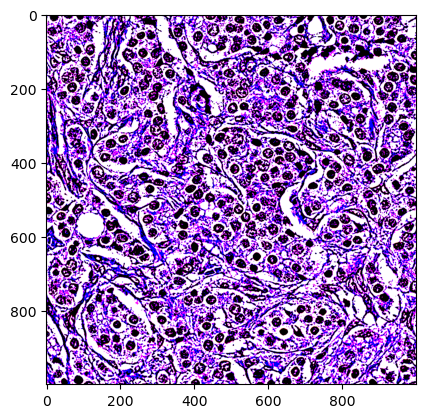

In [27]:
plt.imshow(cv2.convertScaleAbs(thr, alpha=20, beta=0))

In [28]:
new_img = cv2.convertScaleAbs(thr, alpha=20, beta=0)

In [29]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 
  
# Sharpen the image 
sharpened_image = cv2.filter2D(new_img, -1, kernel) 

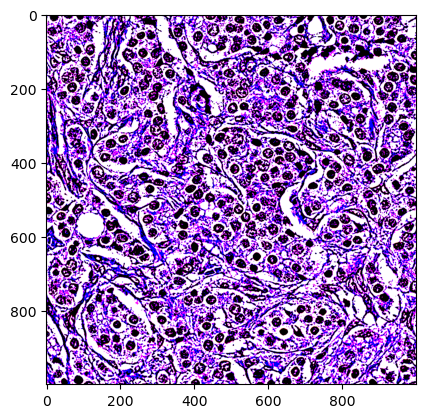

In [30]:
plt.imshow(sharpened_image)

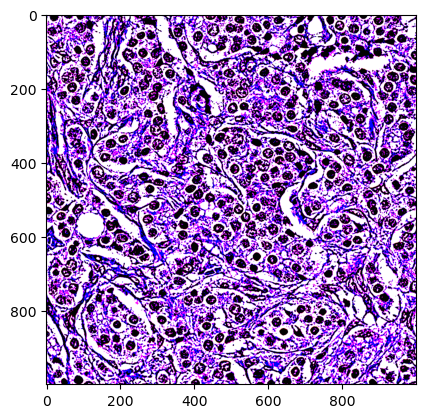

In [31]:
contrast = 5. # Contrast control ( 0 to 127)
brightness = 2. # Brightness control (0-100)

out = cv2.addWeighted( sharpened_image, contrast, 
                      sharpened_image, 0, brightness)
plt.imshow(out)

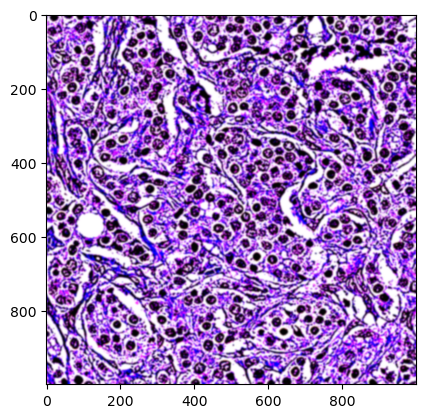

In [32]:
blurred = cv2.GaussianBlur(out, (11,11),0)
plt.imshow(blurred)

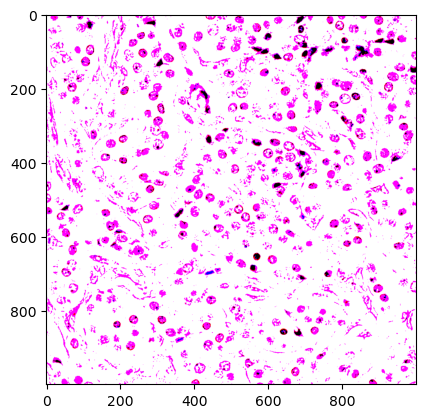

In [33]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image

img = cv2.imread(r'Image.png')
enhanced  = cv2.convertScaleAbs(img, alpha=2.5, beta=0)
ret , thr = cv2.threshold(enhanced , 215, 200 , cv2.THRESH_BINARY)
plt.imshow(cv2.convertScaleAbs(thr, alpha=4.5, beta=0))

In [34]:
enh_gr = cv2.cvtColor(cv2.convertScaleAbs(thr, alpha=2.5, beta=0) , cv2.COLOR_RGB2GRAY)
can = cv2.Canny(enh_gr , 100 , 225)
con , hie = cv2.findContours(can , cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


In [35]:
img2 = img

In [36]:
colors = [(255 , 0 , 0) , (0 , 255 , 0) , (0 , 0 , 255) , (255 , 255 , 0) , (0 , 255 , 255)]


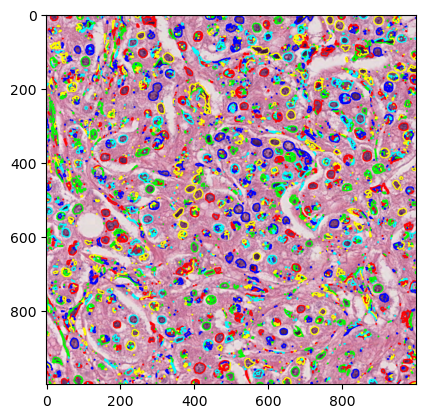

In [37]:
for i, cont in enumerate(con):
    cv2.drawContours(img2 , [cont]  , -1  , colors[i%len(colors)], 2)

plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

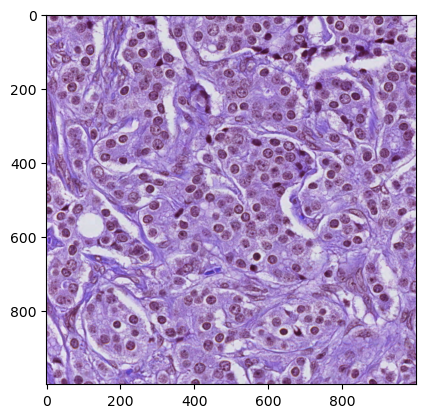

In [38]:
import cv2
import numpy as np

# Load the image and convert it to grayscale
img = cv2.imread('Image.png')
plt.imshow(img)

In [39]:
img2 = img

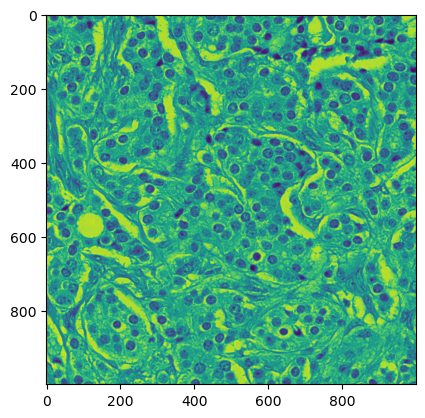

In [40]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

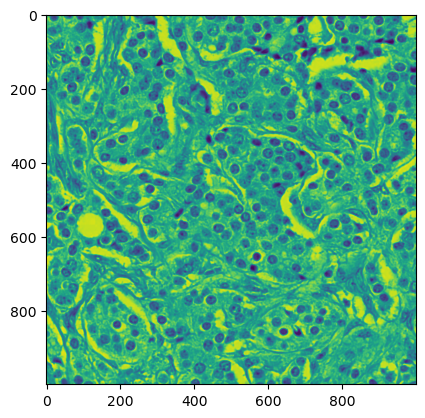

In [41]:
# Apply Gaussian blur to reduce noise
gray = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(gray)

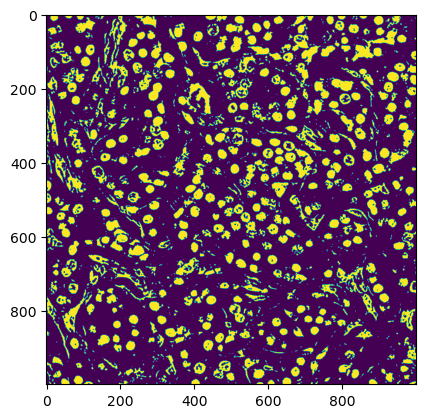

In [42]:
# Apply binary threshold to convert to binary image
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh)

In [43]:
# Detect contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [44]:
# Filter out tiny dots based on size
min_area = 100
max_area = 2000
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area and cv2.contourArea(cnt) < max_area]


In [45]:
# Define a list of colors
colors = [(0, 0, 255), (255, 0, 0), (0, 255, 0), (255, 255, 0), (0, 255, 255), (255, 0, 255)]

In [46]:
# Draw the filtered contours on the original image using different colors
for i, cnt in enumerate(filtered_contours):
    cv2.drawContours(img2, [cnt], -1, colors[i % len(colors)], 2)

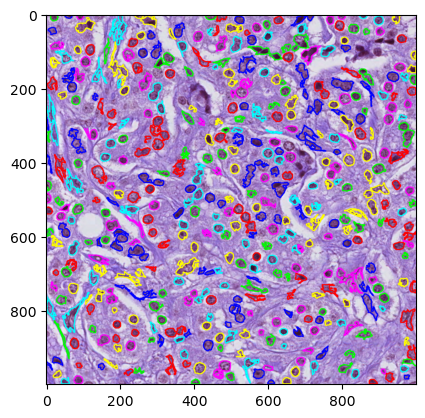

In [47]:
plt.imshow(img2)